In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from utils import modeling_utils as mu
from utils.plotting_utils import *

In [3]:
df = pd.read_csv('../data/german_credit_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.columns = [x.lower().replace(' ', '_') for x in df.columns]
df['target'] = (df.risk == 'bad').astype(int)
df.sample(3)

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,target
847,28,male,2,own,little,NaN,1249,24,car,good,0
480,23,female,1,own,little,moderate,3573,12,radio/TV,good,0
309,22,male,1,rent,little,moderate,276,9,car,good,0


In [4]:
test_set_results = pd.read_csv('../data/test_set_results.csv')

In [5]:
y_test = test_set_results.y_test
y_pred_proba = test_set_results.y_pred_proba

## scenario 1 

In [22]:
## scenario 1
bad_client_incidence = 0.3
bad_customer_cost = 1

m = metrics_by_threshold_table = mu.get_metrics_by_threshold_table(y_test, y_pred_proba, bad_customer_cost)

In [23]:
m

,thres,precision,recall/sensitivity,specificity,lost_good_clients,avoided_bad_clients,loss,gain,expected_return,bottom_line,color
0,0.0,30.00,100.00,0.00,140,60,140,60,-80,0,gray
1,0.1,34.57,93.33,24.29,106,56,106,56,-50,30,gray
2,0.2,42.62,86.67,50.00,70,52,70,52,-18,62,gray
3,0.3,52.94,75.00,71.43,40,45,40,45,5,85,gray
4,0.4,56.45,58.33,80.71,27,35,27,35,8,88,gray
5,0.5,58.14,41.67,87.14,18,25,18,25,7,87,gray
6,0.6,72.00,30.00,95.00,7,18,7,18,11,91,gold
7,0.7,100.00,13.33,100.00,0,8,0,8,8,88,gray
8,0.8,NaN,0.00,100.00,0,0,0,0,0,80,gray


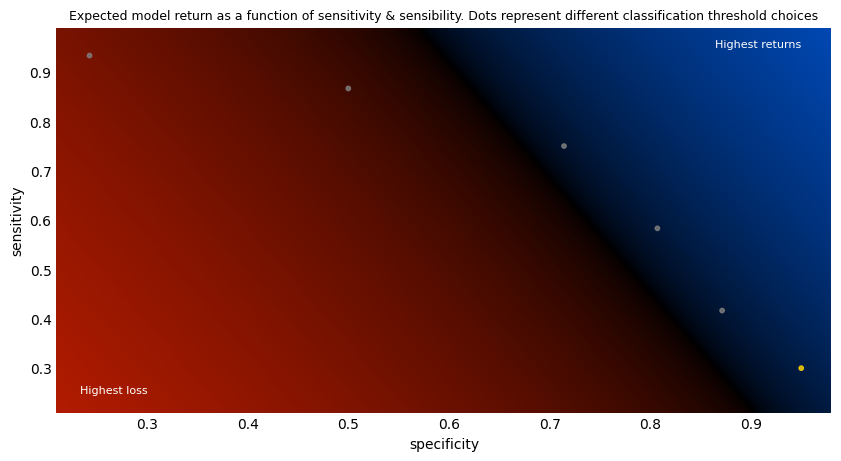

In [24]:
plot_specificity_sensitivity(bad_client_incidence = bad_client_incidence, bad_client_cost = bad_customer_cost,
         specificity_range = (0.21, .98), sensitivity_range = (0.21, .99), 
         highlighted_points = [
                m['specificity']/100, m['recall/sensitivity']/100,
                m['thres'].tolist(), m['color'].tolist()])

([<matplotlib.axis.YTick at 0x13ea37710>],
 [Text(0, 1, '$\\mathdefault{10^{0}}$')])

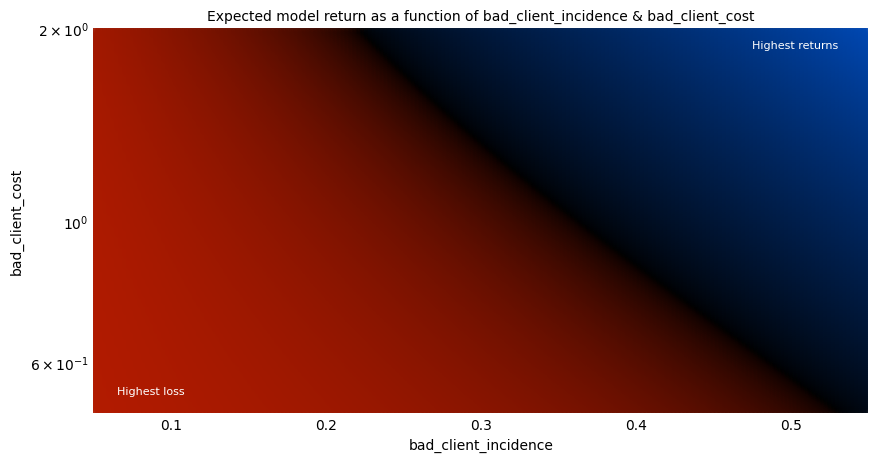

In [33]:
sensitivity, specificity, threshold = m[m.color == 'gold'][['recall/sensitivity', 'specificity', 'thres']].values[0]/100

plot_default_and_loss(specificity = specificity, sensitivity = sensitivity,
     bad_client_incidence_range = (0.05, 0.55),
        bad_client_cost_range = (0.5, 2),
        highlighted_points=(bad_client_incidence, bad_customer_cost))

## scenario 2

In [28]:
## scenario 1
bad_client_incidence = 0.3
bad_customer_cost = 5

m = metrics_by_threshold_table = mu.get_metrics_by_threshold_table(y_test, y_pred_proba, bad_customer_cost)

In [29]:
m

,thres,precision,recall/sensitivity,specificity,lost_good_clients,avoided_bad_clients,loss,gain,expected_return,bottom_line,color
0,0.0,30.00,100.00,0.00,140,60,140,300,160,0,gray
1,0.1,34.57,93.33,24.29,106,56,106,280,174,14,gray
2,0.2,42.62,86.67,50.00,70,52,70,260,190,30,gold
3,0.3,52.94,75.00,71.43,40,45,40,225,185,25,gray
4,0.4,56.45,58.33,80.71,27,35,27,175,148,-12,gray
5,0.5,58.14,41.67,87.14,18,25,18,125,107,-53,gray
6,0.6,72.00,30.00,95.00,7,18,7,90,83,-77,gray
7,0.7,100.00,13.33,100.00,0,8,0,40,40,-120,gray
8,0.8,NaN,0.00,100.00,0,0,0,0,0,-160,gray


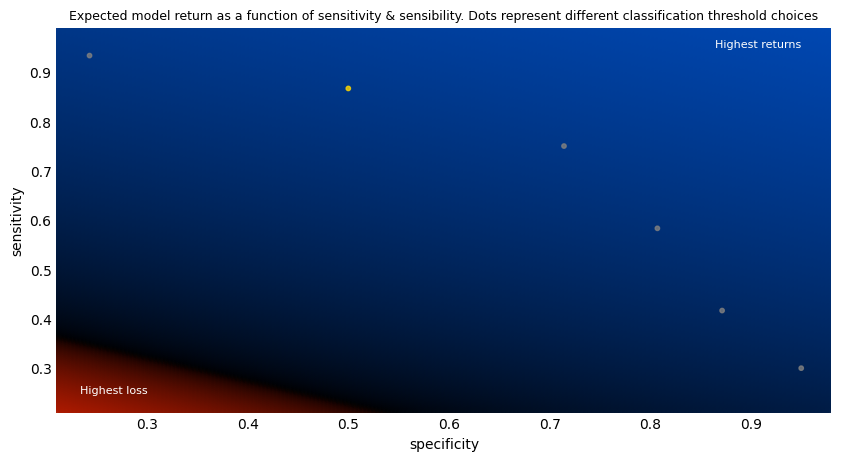

In [30]:
plot_specificity_sensitivity(bad_client_incidence = bad_client_incidence, bad_client_cost = bad_customer_cost,
         specificity_range = (0.21, .98), sensitivity_range = (0.21, .99), 
         highlighted_points = [
                m['specificity']/100, m['recall/sensitivity']/100,
                m['thres'].tolist(), m['color'].tolist()])

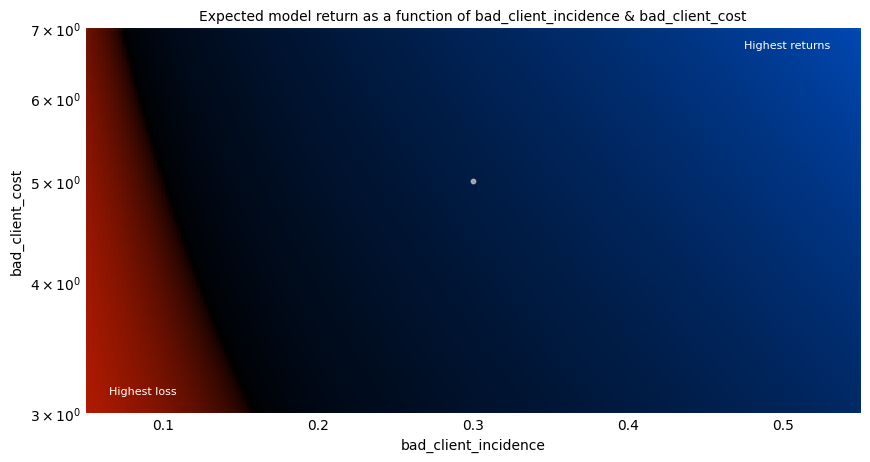

In [32]:
sensitivity, specificity, threshold = m[m.color == 'gold'][['recall/sensitivity', 'specificity', 'thres']].values[0]/100

plot_default_and_loss(specificity = specificity, sensitivity = sensitivity,
     bad_client_incidence_range = (0.05, 0.55),
        bad_client_cost_range = (3, 7),
        highlighted_points=(bad_client_incidence, bad_customer_cost))